# Feature engineering

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data.


# 1.Handling missing values 

Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys

 *Feature Engineering---Handling Missing Values
 
 *Why are their Missing values?? 
 
 1.Survey--Depression Survey

 2.They hesitate to put down the information

 3.Survey informations are not that valid
 
 4.Men--salary
 
 5.Women---age
 
 6.People may have died----NAN
 
  Data Science Projects---Dataset should be collected from multiple sources

# What are the different types of Missing Data?

1.Missing Completely at Random(MCAR) : When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset

In [3]:
import pandas as pd

In [5]:
file_path = 'Downloads/titanic data set.csv'
df=pd.read_csv(file_path)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2.Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [15]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [17]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

3.Missing At Random(MAR) : Missing at random (MAR) occurs when the missingness is not random, 
but where missingness can be fully accounted for by variables where there is complete information. 

for example : 1.Men---hide their salary
              2.Women---hide their age

# All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# 1. Mean/ Median/Mode replacement

When should we apply?

*Mean/median imputation has the assumption that the data are missing completely at random(MCAR).

*We solve this by replacing the NAN with the mean,median,mode.

In [20]:
df = pd.read_csv('Downloads/titanic data set.csv', usecols = ['Age','Survived','Fare'])

In [21]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [30]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [32]:
mean = df.Age.mean()
mean

29.69911764705882

In [39]:
def impute_nan(df,variable,mean):
    df[variable+'_mean'] = df[variable].fillna(mean)

In [57]:
impute_nan(df,'Age',mean)

In [58]:
df

,Survived,Age,Fare,Age_mean
0,0,22.0,7.2500,22.000000
1,1,38.0,71.2833,38.000000
2,1,26.0,7.9250,26.000000
3,1,35.0,53.1000,35.000000
4,0,35.0,8.0500,35.000000
...,...,...,...,...
886,0,27.0,13.0000,27.000000
887,1,19.0,30.0000,19.000000
888,0,NaN,23.4500,29.699118
889,1,26.0,30.0000,26.000000


In [59]:
print(df['Age'].std())
print(df['Age_mean'].std())

14.526497332334044
13.002015226002884


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

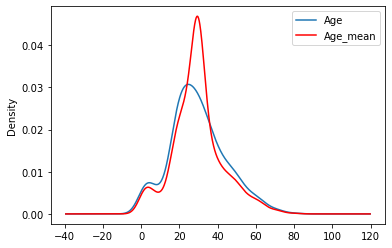

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages of Mean/Median Imputation

*Easy to implement(Robust to outliers)

*Faster way to obtain the complete dataset 

# Disadvantages of Mean/Median Imputation

*Change or Distortion in the original variance

*impacts Correlation

# 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

When should it be used?

It assumes that the data are missing completely at random(MCAR)

In [160]:
df=pd.read_csv(file_path,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [161]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [162]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [163]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [164]:
def impute_nan(df,variable,median):
    df[variable+'_random'] = df[variable]
     ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [182]:
median=df['Age'].median()
median

28.0

In [183]:
impute_nan(df,'Age',median)

In [184]:
df

,Survived,Age,Fare,Age_nan,Age_random
0,0,22.0,7.2500,0,22.0
1,1,38.0,71.2833,0,38.0
2,1,26.0,7.9250,0,26.0
3,1,35.0,53.1000,0,35.0
4,0,35.0,8.0500,0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,0,27.0
887,1,19.0,30.0000,0,19.0
888,0,28.0,23.4500,1,28.0
889,1,26.0,30.0000,0,26.0


In [185]:
import matplotlib.pyplot as plt
%matplotlib inline

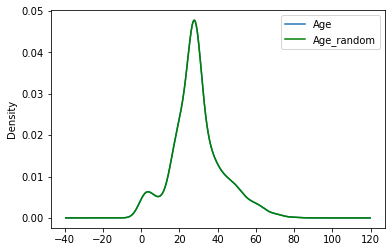

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In this case randon sample working well when it compare to median

Advantages

*Easy To implement

*There is less distortion in variance

Disadvantage

*Every situation randomness wont work

# 3. Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [187]:
df=pd.read_csv(file_path,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [188]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [189]:
df

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [190]:
df.Age.median()

28.0

In [191]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [192]:
df

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


Advantages

*Easy to implement

*Captures the importance of missing values

Disadvantages

*Creating Additional Features(Curse of Dimensionality)

# 4.End of Distribution imputation

It works well if the data are not missing completely at random.

here we replace nan values with end of distribution value. 

In [195]:
df=pd.read_csv(file_path,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

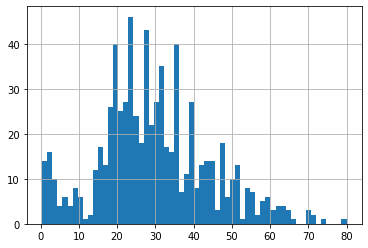

In [199]:
df.Age.hist(bins=60)

In [204]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

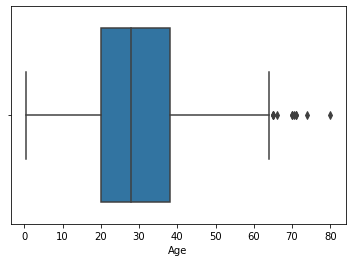

In [205]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [206]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [207]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [208]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

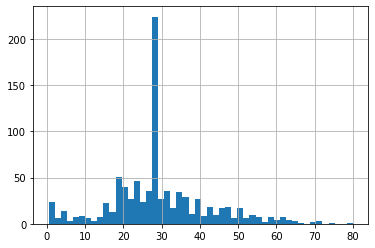

In [209]:
df['Age'].hist(bins=50)

<AxesSubplot:>

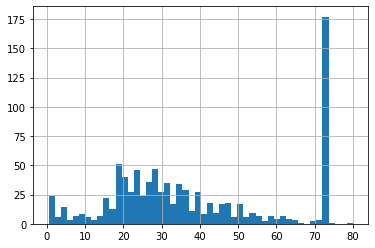

In [210]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

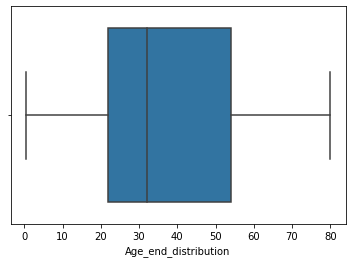

In [211]:
sns.boxplot('Age_end_distribution',data=df)

# Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value.

here we replace nan values with least outlier value and with max outlier value.

In [212]:
df=pd.read_csv(file_path,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [216]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)#here we can take 80,90 also

<AxesSubplot:>

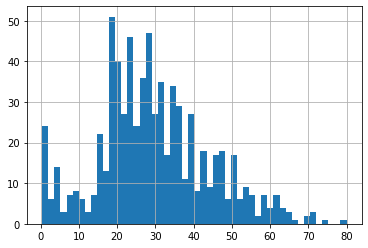

In [217]:
df['Age'].hist(bins=50)

Advantages

*Easy to implement

*Captures the importance of missingess if there is one

Disadvantages

*Distorts the original distribution of the variable

*If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

*Hard to decide which value to use